Kunskapskontroll 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from sklearn.metrics import classification_report
from sklearn.datasets import fetch_openml

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.utils import resample

from sklearn.svm import LinearSVC
from sklearn.svm import SVC

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

Preparing and fetching dataset

In [2]:
mnist = fetch_openml('mnist_784', version = 1, cache = True, as_frame = False)

print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [3]:
X = mnist["data"]
y = mnist["target"].astype(np.uint8)

EDA

In [4]:
print(f"Dataset Shape: {X.shape}, Labels Shape: {y.shape}")

Dataset Shape: (70000, 784), Labels Shape: (70000,)


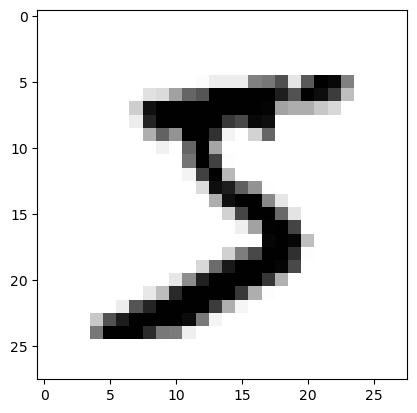

In [5]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=plt.get_cmap("binary"))

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
X_train_sample, y_train_sample = resample(X_train, y_train, n_samples=10000, random_state=42)

In [ ]:
param_grid = {
    'max_depth': [10, 20, None],  # Maximum depth of tree
    'min_samples_split': [2, 10],  # Min samples to split a node
    'min_samples_leaf': [1, 4],  # Min samples at a leaf node
    'max_features': ['sqrt', 'log2']  # Feature selection method
}

# Initialize DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=42)

# GridSearchCV with 3-fold cross-validation
grid_search = GridSearchCV(
    estimator=dt_clf, param_grid=param_grid,
    cv=3, n_jobs=-1, verbose=2, scoring='accuracy'
)

# Fit on training data
grid_search.fit(X_train_sample, y_train_sample)

# Get the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Accuracy: 0.7632990353624445


In [13]:
# Extract best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train final RandomForest model with best parameters
best_dt_clf = DecisionTreeClassifier(**best_params, random_state=42)
best_dt_clf.fit(X_train, y_train)  # Fit on the full training set

# Predict on the test set
y_pred = best_dt_clf.predict(X_test)

# Evaluate the performance
print("Test Accuracy:", accuracy_score(y_test, y_pred))


Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
Test Accuracy: 0.8329285714285715


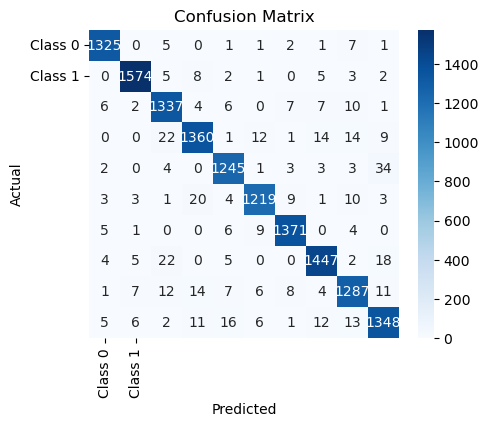

In [10]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [11]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.9652


In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1343
           1       0.98      0.98      0.98      1600
           2       0.95      0.97      0.96      1380
           3       0.96      0.95      0.95      1433
           4       0.96      0.96      0.96      1295
           5       0.97      0.96      0.96      1273
           6       0.98      0.98      0.98      1396
           7       0.97      0.96      0.97      1503
           8       0.95      0.95      0.95      1357
           9       0.94      0.95      0.95      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.96      0.96     14000
weighted avg       0.97      0.97      0.97     14000

